### Mega Millions Jackpot Project
#### by Erika Harrell
#### A project exploring data downloaded from data.gov on the winning numbers from the Mega Millions Jackpot in the New York State Lottery drawn from 2/3/2010 to 2/19/2025.

In [1]:
#apply packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
#make cells show all output 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#read in data
df = pd.read_csv('nylottery.csv')

In [4]:
#1st 5 rows of data
df.head()

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0


In [5]:
#last 5 rows of data frame
df.tail()

,Draw Date,Winning Numbers,Multiplier
1743,02/10/2025,02 17 18 29 43 03,3.0
1744,02/12/2025,21 32 36 45 49 18,2.0
1745,02/15/2025,03 16 45 54 56 12,2.0
1746,02/17/2025,04 44 47 52 57 09,4.0
1747,02/19/2025,06 21 28 49 60 20,2.0


In [6]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1748 non-null   object 
 1   Winning Numbers  1748 non-null   object 
 2   Multiplier       1538 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.1+ KB


In [7]:
#turn draw Date column into Date column with datetime format
df['Date']=pd.to_datetime(df['Draw Date'])

In [8]:
#creating separate variables for each winning number
df[['win_num_1', 'win_num_2', 'win_num_3','win_num_4', 'win_num_5', 'win_num_6']] = df['Winning Numbers'].str.split(expand=True)

In [9]:
#get the day of the week, month and year from the Date variable
df['Day of the week']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year

In [10]:
#make the winning number columns numeric
df['win_num_1']=pd.to_numeric(df['win_num_1'])
df['win_num_2']=pd.to_numeric(df['win_num_2'])
df['win_num_3']=pd.to_numeric(df['win_num_3'])
df['win_num_4']=pd.to_numeric(df['win_num_4'])
df['win_num_5']=pd.to_numeric(df['win_num_5'])
df['win_num_6']=pd.to_numeric(df['win_num_6'])

In [11]:
#check 1st five rows of dataframe
df.head()

,Draw Date,Winning Numbers,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,win_num_6,Day of the week,Month,Year
0,09/26/2020,11 21 27 36 62 24,3.0,2020-09-26,11,21,27,36,62,24,Saturday,September,2020
1,09/30/2020,14 18 36 49 67 18,2.0,2020-09-30,14,18,36,49,67,18,Wednesday,September,2020
2,10/03/2020,18 31 36 43 47 20,2.0,2020-10-03,18,31,36,43,47,20,Saturday,October,2020
3,10/07/2020,06 24 30 53 56 19,2.0,2020-10-07,6,24,30,53,56,19,Wednesday,October,2020
4,10/10/2020,05 18 23 40 50 18,3.0,2020-10-10,5,18,23,40,50,18,Saturday,October,2020


In [12]:
#check last 5 rows of dataframe
df.tail()

,Draw Date,Winning Numbers,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,win_num_6,Day of the week,Month,Year
1743,02/10/2025,02 17 18 29 43 03,3.0,2025-02-10,2,17,18,29,43,3,Monday,February,2025
1744,02/12/2025,21 32 36 45 49 18,2.0,2025-02-12,21,32,36,45,49,18,Wednesday,February,2025
1745,02/15/2025,03 16 45 54 56 12,2.0,2025-02-15,3,16,45,54,56,12,Saturday,February,2025
1746,02/17/2025,04 44 47 52 57 09,4.0,2025-02-17,4,44,47,52,57,9,Monday,February,2025
1747,02/19/2025,06 21 28 49 60 20,2.0,2025-02-19,6,21,28,49,60,20,Wednesday,February,2025


In [13]:
#put dataframe in order by date
df=df.sort_values(by='Date', ignore_index=True)
#look at 1st 5 rows
df.head()

,Draw Date,Winning Numbers,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,win_num_6,Day of the week,Month,Year
0,02/03/2010,17 22 36 37 52 24,2.0,2010-02-03,17,22,36,37,52,24,Wednesday,February,2010
1,02/06/2010,14 22 52 54 59 04,3.0,2010-02-06,14,22,52,54,59,4,Saturday,February,2010
2,02/10/2010,05 08 29 37 38 34,5.0,2010-02-10,5,8,29,37,38,34,Wednesday,February,2010
3,02/13/2010,10 14 30 40 51 01,4.0,2010-02-13,10,14,30,40,51,1,Saturday,February,2010
4,02/17/2010,07 08 19 26 36 15,3.0,2010-02-17,7,8,19,26,36,15,Wednesday,February,2010


In [14]:
#look at last 5 rows
df.tail()

,Draw Date,Winning Numbers,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,win_num_6,Day of the week,Month,Year
1743,02/10/2025,02 17 18 29 43 03,3.0,2025-02-10,2,17,18,29,43,3,Monday,February,2025
1744,02/12/2025,21 32 36 45 49 18,2.0,2025-02-12,21,32,36,45,49,18,Wednesday,February,2025
1745,02/15/2025,03 16 45 54 56 12,2.0,2025-02-15,3,16,45,54,56,12,Saturday,February,2025
1746,02/17/2025,04 44 47 52 57 09,4.0,2025-02-17,4,44,47,52,57,9,Monday,February,2025
1747,02/19/2025,06 21 28 49 60 20,2.0,2025-02-19,6,21,28,49,60,20,Wednesday,February,2025


In [15]:
#look at information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        1748 non-null   object        
 1   Winning Numbers  1748 non-null   object        
 2   Multiplier       1538 non-null   float64       
 3   Date             1748 non-null   datetime64[ns]
 4   win_num_1        1748 non-null   int64         
 5   win_num_2        1748 non-null   int64         
 6   win_num_3        1748 non-null   int64         
 7   win_num_4        1748 non-null   int64         
 8   win_num_5        1748 non-null   int64         
 9   win_num_6        1748 non-null   int64         
 10  Day of the week  1748 non-null   object        
 11  Month            1748 non-null   object        
 12  Year             1748 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(4)
memory usage: 170.8+ KB


In [16]:
#check for missing values
df.isnull().sum()

Draw Date            0
Winning Numbers      0
Multiplier         210
Date                 0
win_num_1            0
win_num_2            0
win_num_3            0
win_num_4            0
win_num_5            0
win_num_6            0
Day of the week      0
Month                0
Year                 0
dtype: int64

In [17]:
#get the years covered in the dataset
df['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025], dtype=int32)

In [18]:
#show number of entries per year
#create series out of Year frequencies
year_freqs=list(df['Year'].value_counts())
year_values=df['Year'].unique()
year_freqs
year_values
yr_series = pd.Series(year_freqs,index=year_values)
yr_series
yr_series.info()

[157, 156, 154, 122, 105, 105, 105, 104, 104, 104, 104, 104, 104, 103, 95, 22]

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025], dtype=int32)

2010    157
2011    156
2012    154
2013    122
2014    105
2015    105
2016    105
2017    104
2018    104
2019    104
2020    104
2021    104
2022    104
2023    103
2024     95
2025     22
dtype: int64

<class 'pandas.core.series.Series'>
Index: 16 entries, 2010 to 2025
Series name: None
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


<Axes: >

Text(0.5, 1.0, 'Number of Observations for Each Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Observations')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022'),
  Text(13, 0, '2023'),
  Text(14, 0, '2024'),
  Text(15, 0, '2025')])

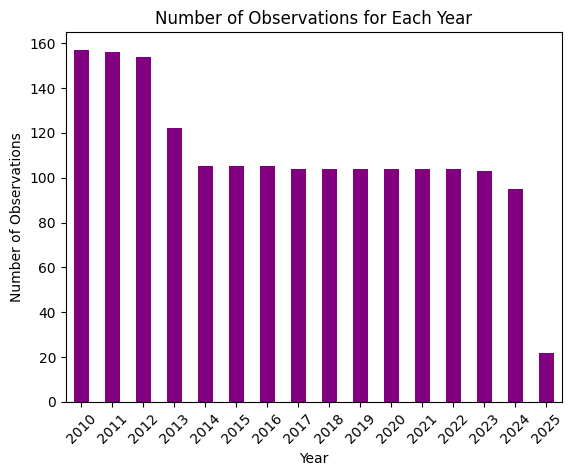

In [19]:
#create the bar chart
yr_series.plot(kind='bar', color='purple')

# Add title and labels
plt.title('Number of Observations for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')

#rotate labels on x axis 45 degrees so that they can be seen
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [20]:
#get number of rows by day of the week
df['Day of the week'].value_counts()

Day of the week
Wednesday    785
Saturday     781
Monday       182
Name: count, dtype: int64

In [21]:
#get mode of each winning number
print('The most frequent 1st winning number is', statistics.mode(df['win_num_1']), '.')
print('The most frequent 2nd winning number is', statistics.mode(df['win_num_2']), '.')
print('The most frequent 3rd winning number is', statistics.mode(df['win_num_3']), '.')
print('The most frequent 4th winning number is', statistics.mode(df['win_num_4']), '.')
print('The most frequent 5th winning number is', statistics.mode(df['win_num_5']), '.')
print('The most frequent 6th winning number is', statistics.mode(df['win_num_6']), '.')

The most frequent 1st winning number is 1 .
The most frequent 2nd winning number is 12 .
The most frequent 3rd winning number is 33 .
The most frequent 4th winning number is 53 .
The most frequent 5th winning number is 69 .
The most frequent 6th winning number is 24 .


In [22]:
#get the median for each winning number
print('The median of the 1st winning numbers is', round(statistics.median(df['win_num_1'])), '.')
print('The median of the 2nd winning numbers is', round(statistics.median(df['win_num_2'])), '.')
print('The median of the 3rd winning numbers is', round(statistics.median(df['win_num_3'])), '.')
print('The median of the 4th winning numbers is', round(statistics.median(df['win_num_4'])), '.')
print('The median of the 5th winning numbers is', round(statistics.median(df['win_num_5'])), '.')
print('The median of the 6th winning numbers is', round(statistics.median(df['win_num_6'])), '.')

The median of the 1st winning numbers is 9 .
The median of the 2nd winning numbers is 21 .
The median of the 3rd winning numbers is 34 .
The median of the 4th winning numbers is 46 .
The median of the 5th winning numbers is 57 .
The median of the 6th winning numbers is 15 .


In [23]:
#get the mean of each winning number
print('The mean of the 1st winning numbers is', round(np.mean(df['win_num_1'])), '.')
print('The mean of the 2nd winning numbers is', round(np.mean(df['win_num_2'])), '.')
print('The mean of the 3rd winning numbers is', round(np.mean(df['win_num_3'])), '.')
print('The mean of the 4th winning numbers is', round(np.mean(df['win_num_4'])), '.')
print('The mean of the 5th winning numbers is', round(np.mean(df['win_num_5'])), '.')
print('The mean of the 6th winning numbers is', round(np.mean(df['win_num_6'])), '.')

The mean of the 1st winning numbers is 11 .
The mean of the 2nd winning numbers is 22 .
The mean of the 3rd winning numbers is 34 .
The mean of the 4th winning numbers is 45 .
The mean of the 5th winning numbers is 55 .
The mean of the 6th winning numbers is 15 .


In [24]:
#get the lowest and highest integer for each winning number
print("The lowest first winning number is", round(min(df['win_num_1'])), "and the highest first winning number is", round(max(df['win_num_1'])), ".")
print("The lowest second winning number is", round(min(df['win_num_2'])), "and the highest second winning number is", round(max(df['win_num_2'])), ".")
print("The lowest third winning number is", round(min(df['win_num_3'])), "and the highest third winning number is", round(max(df['win_num_3'])), ".")
print("The lowest fourth winning number is", round(min(df['win_num_4'])), "and the highest fourth winning number is", round(max(df['win_num_4'])), ".")
print("The lowest fifth winning number is", round(min(df['win_num_5'])), "and the highest fifth winning number is", round(max(df['win_num_5'])), ".")
print("The lowest sixth winning number is", round(min(df['win_num_6'])), "and the highest sixth winning number is", round(max(df['win_num_6'])), ".")

The lowest first winning number is 1 and the highest first winning number is 52 .
The lowest second winning number is 2 and the highest second winning number is 61 .
The lowest third winning number is 3 and the highest third winning number is 65 .
The lowest fourth winning number is 7 and the highest fourth winning number is 68 .
The lowest fifth winning number is 19 and the highest fifth winning number is 69 .
The lowest sixth winning number is 1 and the highest sixth winning number is 39 .


<Axes: >

Text(0.5, 0, 'Value')

Text(0.5, 1.0, 'Whisker and Boxplots of the Distributions of Each Wiinning Number')

([<matplotlib.axis.YTick at 0x271ac132850>,
 [Text(0, 1, '6th number'),
  Text(0, 2, '5th number'),
  Text(0, 3, '4th number'),
  Text(0, 4, '3rd number'),
  Text(0, 5, '2nd number'),
  Text(0, 6, '1st number')])

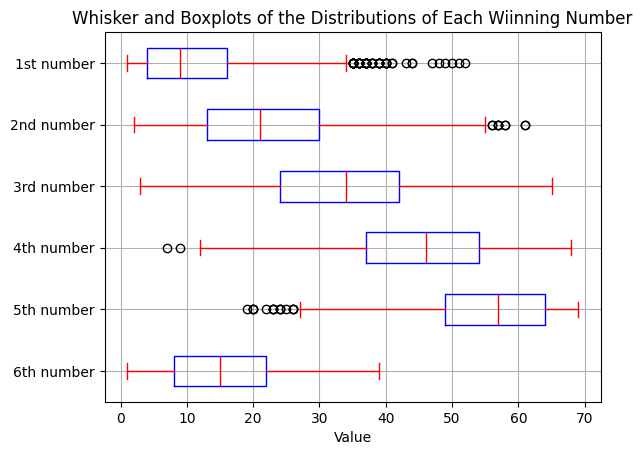

In [25]:
#boxplots for each winning number showing distribution
labels=['6th number','5th number','4th number','3rd number','2nd number','1st number']
df.boxplot(column=['win_num_6','win_num_5','win_num_4','win_num_3','win_num_2','win_num_1'],
           boxprops=dict(color='blue'), whiskerprops=dict(color='red'),capprops=dict(color='red'),medianprops=dict(color='red'),
           vert=False)
plt.xlabel('Value')
plt.title("Whisker and Boxplots of the Distributions of Each Wiinning Number")
plt.yticks(range(1,len(labels)+1),labels)
plt.show()

In [26]:
#all the values of the Multiplier variable
df['Multiplier'].unique()

array([ 2.,  3.,  5.,  4., 10., nan])

In [27]:
#create series out of Multilpier frequencies
#create list out of list out of frequency tables for Multiplier column
mult_freqs=list(df['Multiplier'].value_counts())

#add the number of of missing values to the end of the list
mult_freqs.append(df.shape[0]-sum(mult_freqs))

#create object out of the unique values in the Multiplier column (which includes nan)
mult_values=df['Multiplier'].unique()

#show frequencies of unique values
mult_freqs

#shoe the the unique values
mult_values

#create Series with mult freq and mult_values as the index
myseries = pd.Series(mult_freqs,index=mult_values)
myseries

#get information about series
myseries.info()

[799, 472, 144, 106, 17, 210]

array([ 2.,  3.,  5.,  4., 10., nan])

2.0     799
3.0     472
5.0     144
4.0     106
10.0     17
NaN     210
dtype: int64

<class 'pandas.core.series.Series'>
Index: 6 entries, 2.0 to nan
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [28]:
#correct myseries index
#put myseries index in a list
myindex=list(myseries.index)

#look at list
myindex

#round labels and add Missing label
myindex[0]=str(round(myindex[0]))
myindex[1]=str(round(myindex[1]))
myindex[2]=str(round(myindex[2]))
myindex[3]=str(round(myindex[3]))
myindex[4]=str(round(myindex[4]))
myindex[5]="Missing"

#look at myindex
myindex

#create myseries with mult_freqs and myindex
myseries=pd.Series(mult_freqs,index=myindex)
myseries

[2.0, 3.0, 5.0, 4.0, 10.0, nan]

['2', '3', '5', '4', '10', 'Missing']

2          799
3          472
5          144
4          106
10          17
Missing    210
dtype: int64

<Axes: >

Text(0.5, 1.0, 'Number of Observations for Each Multiplier')

Text(0.5, 0, 'Multiplier')

Text(0, 0.5, 'Number of Observations')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '5'),
  Text(3, 0, '4'),
  Text(4, 0, '10'),
  Text(5, 0, 'Missing')])

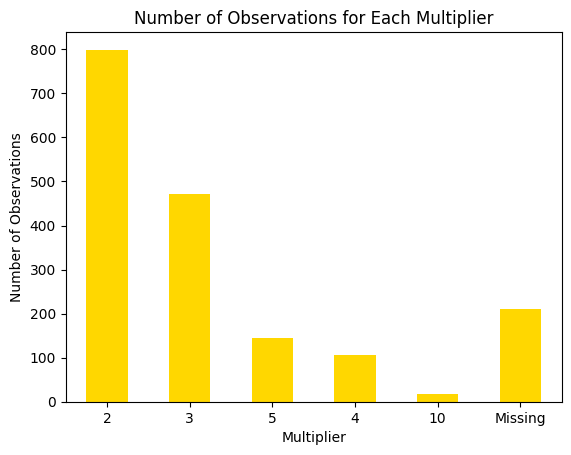

In [29]:
#Create the bar chart
myseries.plot(kind='bar', color='gold')

#Add title and labels
plt.title('Number of Observations for Each Multiplier')
plt.xlabel('Multiplier')
plt.ylabel('Number of Observations')

#rotate x axis labels so that they are readable
plt.xticks(rotation=0)

#Display the chart
plt.show()

Text(0.5, 0, '1st Winning Number')

Text(0.5, 0.5, '2nd Winning Number')

Text(0.5, 0, '3rd Winning Number')

Text(0.5, 0.92, '3D Scatter Plot with the 1st 3 Winning Numbers')

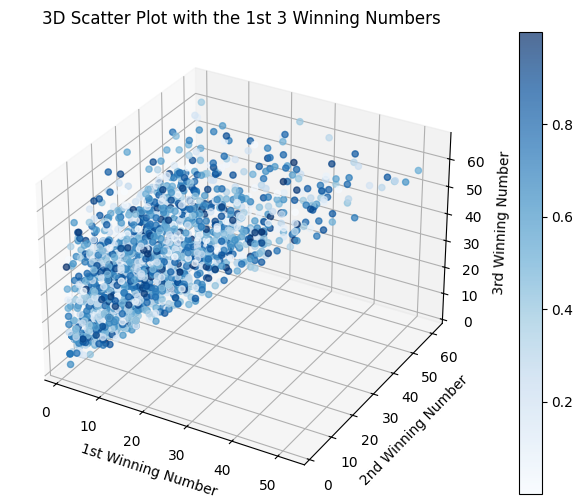

In [30]:
#create 3d plot with first 3 winning numbers
#set x,y,and z coordinates
x = df['win_num_1'].to_numpy()
y = df['win_num_2'].to_numpy()
z = df['win_num_3'].to_numpy()

#set number of colors to be the nnumber of rows in dataframe
colors = np.random.rand(1748)

#set the figures size and create axes 3d object
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

#create the scatter plot within ax
scatter = ax.scatter(x, y, z, c=colors, cmap='Blues', alpha=0.7)

#add labels and title
ax.set_xlabel('1st Winning Number')
ax.set_ylabel('2nd Winning Number')
ax.set_zlabel('3rd Winning Number')
ax.set_title('3D Scatter Plot with the 1st 3 Winning Numbers')

#add a colorbar
fig.colorbar(scatter)

#show the plot
plt.show()

Text(0.5, 0, '4th Winning Number')

Text(0.5, 0.5, '5th Winning Number')

Text(0.5, 0, '6th Winning Number')

Text(0.5, 0.92, '3D Scatter Plot with the Last 3 Winning Numbers')

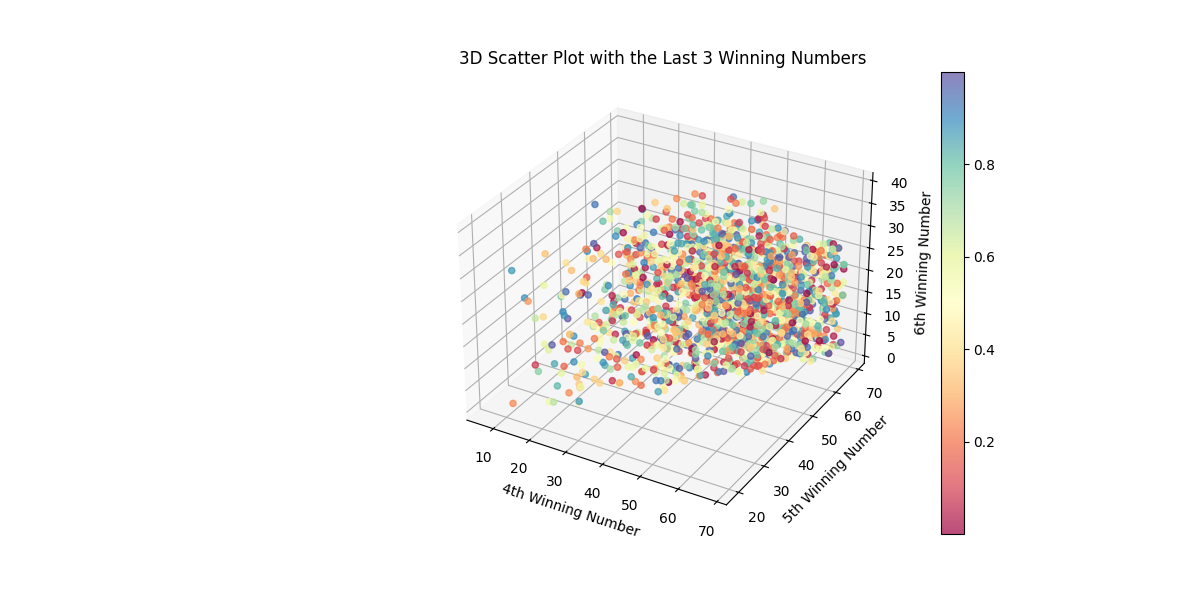

In [35]:
# create 3d plot with last 3 winning numbers
x = df['win_num_4'].to_numpy()
y = df['win_num_5'].to_numpy()
z = df['win_num_6'].to_numpy()
colors = np.random.rand(1748)
# Create the figure and axes object
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=colors, cmap='Spectral', alpha=0.7)

# Add labels and title
ax.set_xlabel('4th Winning Number')
ax.set_ylabel('5th Winning Number')
ax.set_zlabel('6th Winning Number')
ax.set_title('3D Scatter Plot with the Last 3 Winning Numbers')

# Add a colorbar
fig.colorbar(scatter)

# Show the plot
plt.show()

array([[<Axes: title={'center': 'win_num_1'}>]], dtype=object)

Text(0.5, 0, '1st winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 1st winning number')

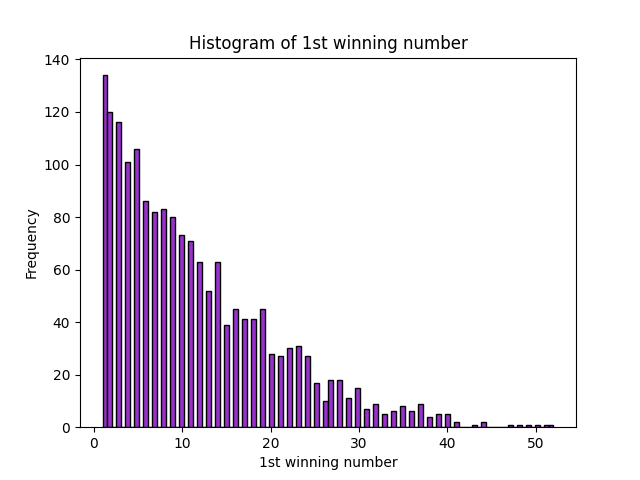

In [57]:
#histogram of 1st winning number
df.hist(column='win_num_1', bins=100, edgecolor='black', color='darkorchid', grid=False)
plt.xlabel('1st winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 1st winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_2'}>]], dtype=object)

Text(0.5, 0, '2nd winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 2nd winning number')

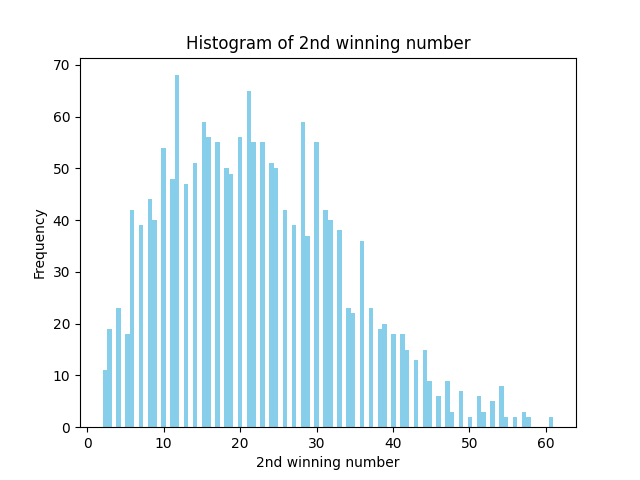

In [58]:
#histogram of 2nd winning number
df.hist(column='win_num_2', bins=100, color='skyblue', grid=False)
plt.xlabel('2nd winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 2nd winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_3'}>]], dtype=object)

Text(0.5, 0, '3rd winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 3rd winning number')

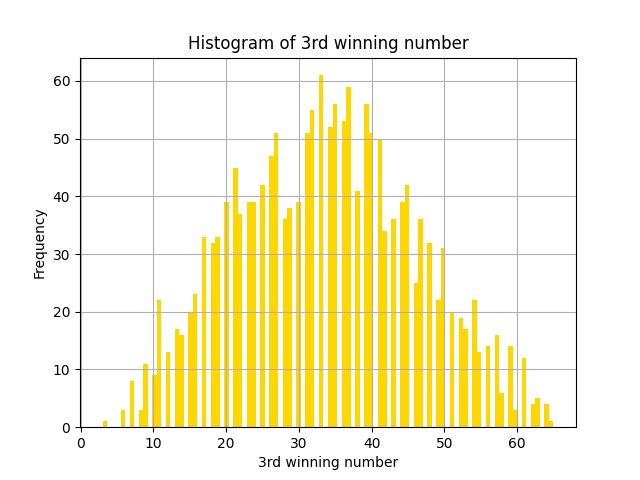

In [60]:
#histogram of 3rd winning number
df.hist(column='win_num_3', bins=100, color='gold')
plt.xlabel('3rd winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 3rd winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_4'}>]], dtype=object)

Text(0.5, 0, '4th winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 4th winning number')

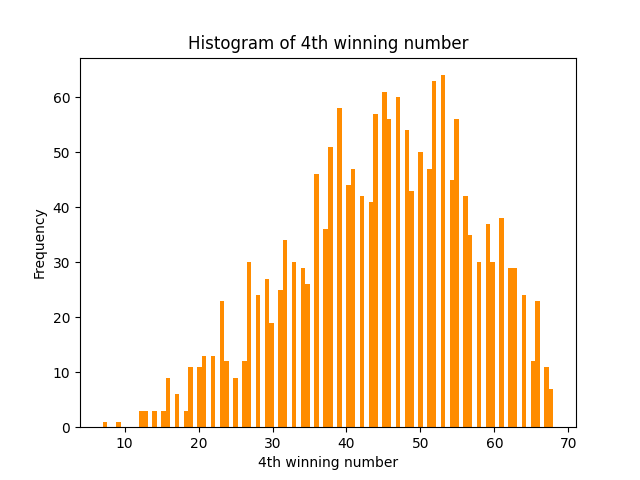

In [59]:
#histogram of 4th winning number
df.hist(column='win_num_4', bins=100, color='darkorange',grid=False)
plt.xlabel('4th winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 4th winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_5'}>]], dtype=object)

Text(0.5, 0, '5th winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 5th winning number')

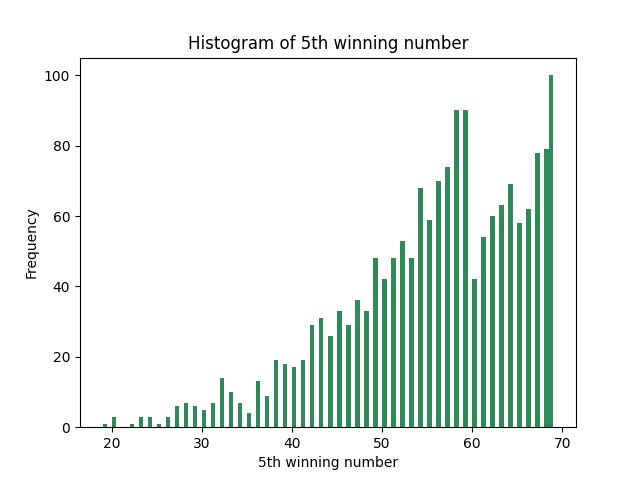

In [61]:
#histogram of 5th winning number
df.hist(column='win_num_5', bins=100, color='seagreen',grid=False)
plt.xlabel('5th winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 5th winning number')
plt.show()

array([[<Axes: title={'center': 'win_num_6'}>]], dtype=object)

Text(0.5, 0, '6th winning number')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of 6th winning number')

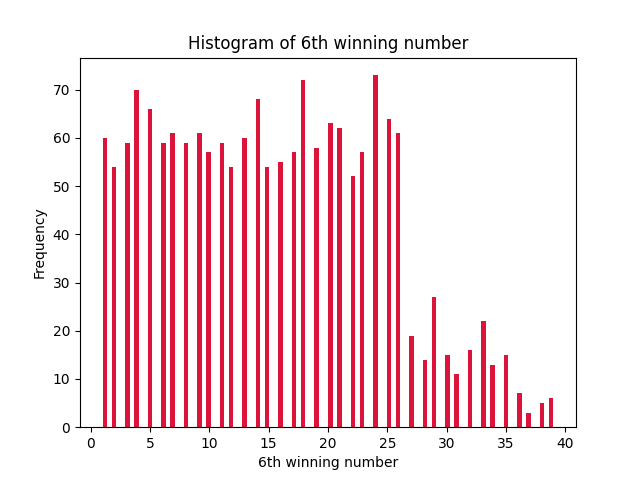

In [62]:
#histogram of 6th winning number
df.hist(column='win_num_6', bins=100, color='crimson',grid=False)
plt.xlabel('6th winning number')
plt.ylabel('Frequency')
plt.title('Histogram of 6th winning number')
plt.show()